In [1]:
import os
import pyrootutils
PROJECT_ROOT_DIR = pyrootutils.setup_root(os.path.abspath(''), dotenv=True, pythonpath=True)
os.chdir(PROJECT_ROOT_DIR)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from src.utils_performance import (
    _all_algorithms_all_datasets_performance,
)
from src.utils_visualization import NotebookFigureSaver
from src.utils_data_centric import _get_all_data_set_characteristics

# Where to save the figures
CHAPTER_ID = "d_correlation"
fig_saver = NotebookFigureSaver(CHAPTER_ID)

In [2]:
# get the characteristic statistics on all data sets
normalized_data_set_characteristics = _get_all_data_set_characteristics(
    multivariate=False, number_data_sets=None, normalize_each_characteristic=True
)
X = pd.DataFrame(normalized_data_set_characteristics)

# get the mean performance of all algorithms on all data sets
algorithm_data_set_performance = _all_algorithms_all_datasets_performance(
    performance_of_interest="$\\hat{\\mu}$", multivariate=False
)
Y = pd.DataFrame(algorithm_data_set_performance).T

# inner join x and y on index
matched_data_sets = X.join(Y, how="inner")
# document how many rows were not matched
num_rows_not_matched = len(X) - len(matched_data_sets)
print(f"Number of rows not matched: {num_rows_not_matched} from total of {len(X)}")

correlation_frames = []
for applied_algorithm in Y.columns:
    # Calculate a correlation matrix for each algorithm
    correlation_matrix = matched_data_sets[list(X.columns) + [applied_algorithm]].corr()
    
    # extract the final row in order to exclude embedding correlations 
    algorithm_embedding_correlation = correlation_matrix.loc[[applied_algorithm]]
    
    # also exclude correlation to the algorithm performance itself 
    correlation_frames.append(algorithm_embedding_correlation.iloc[:, :-1])

# combine all correlation arrays of algorithm performance vs. embeddings
visual_frame = pd.concat(correlation_frames, axis=0)

Number of rows not matched: 12 from total of 124


Saving figure performance_correlation_algorithms


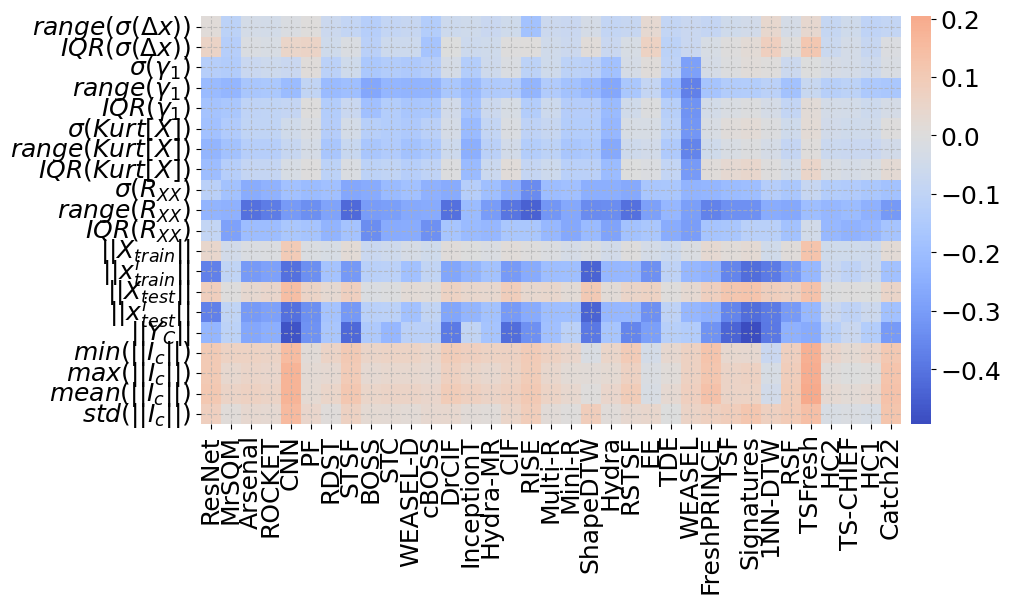

In [41]:
# Visualize the correlation matrix
visual_frame_subset = pd.concat([visual_frame, visual_frame.max(axis=1)], axis=1).sort_values(0).drop(columns=0)
# remove the _ACC string from the algorithm performance index
algorithm_names = [
    algorithm_name.replace("_ACC", "") if algorithm_name.endswith("_ACC") else algorithm_name 
    for algorithm_name in visual_frame_subset.index
]

fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=False, sharey=False)
cbar_ax = fig.add_axes([.91, 0.3, 0.02, .68])

sns.heatmap(
    visual_frame_subset.T.iloc[-20:,:],
    annot=False,
    xticklabels=algorithm_names,
    ax=ax,
    cbar_ax=cbar_ax,
    center=0,
    cmap="coolwarm",
)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)

# ax.set_ylabel("Data set level embedding $h(.)$", fontsize=18)  # Set the y-axis label
ax.tick_params(axis="x",labelsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(visible=True, linestyle="--", alpha=0.7)
plt.subplots_adjust(hspace=.5, wspace=0.05, left=0.2, right=.9, bottom=0.3, top=.98)

fig_saver.save_fig(f"performance_correlation_algorithms")
plt.show()

Saving figure performance_correlation_algorithms_front


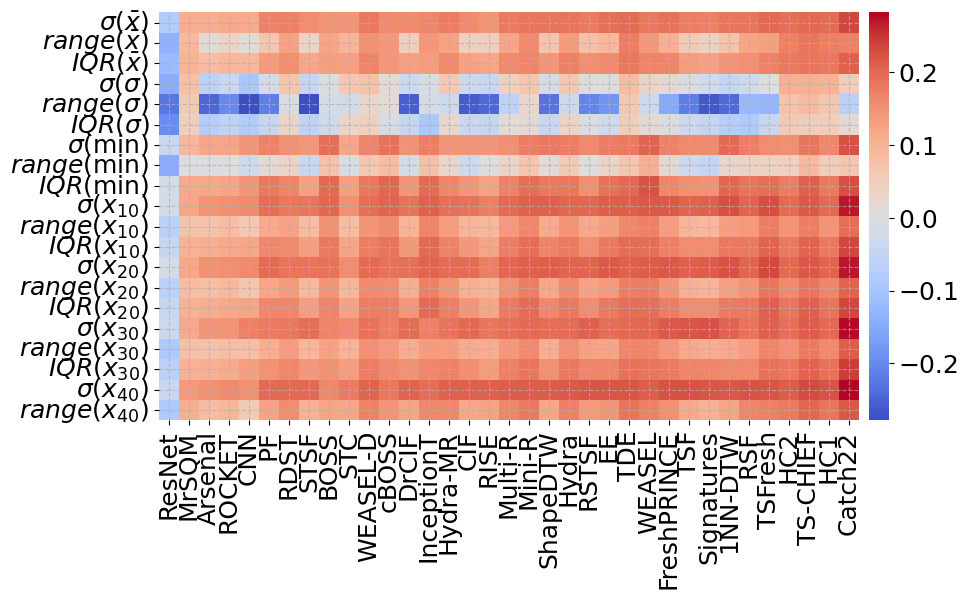

In [42]:
# Visualize the correlation matrix
visual_frame_subset = pd.concat([visual_frame, visual_frame.max(axis=1)], axis=1).sort_values(0).drop(columns=0)
# remove the _ACC string from the algorithm performance index
algorithm_names = [
    algorithm_name.replace("_ACC", "") if algorithm_name.endswith("_ACC") else algorithm_name 
    for algorithm_name in visual_frame_subset.index
]

fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=False, sharey=False)
cbar_ax = fig.add_axes([.91, 0.3, 0.02, .68])

sns.heatmap(
    visual_frame_subset.T.iloc[:20,:],
    annot=False,
    xticklabels=algorithm_names,
    ax=ax,
    cbar_ax=cbar_ax,
    center=0,
    cmap="coolwarm",
)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)

# ax.set_ylabel("Data set level embedding $h(.)$", fontsize=18)  # Set the y-axis label
ax.tick_params(axis="x",labelsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(visible=True, linestyle="--", alpha=0.7)
plt.subplots_adjust(hspace=.5, wspace=0.05, left=0.2, right=.9, bottom=0.3, top=.98)

fig_saver.save_fig(f"performance_correlation_algorithms_front")
plt.show()